### Import Necessary Package

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from pyecharts import Pie
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [61]:
data = pd.read_csv('LoanStats_2018Q2.csv', encoding = 'latin-1', skiprows = 1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,10000.00000,10000.00000,10000.00000,36 months,20.39%,373.63000,D,D4,Realtor,3 years,OWN,26000.00000,Source Verified,Jun-2018,Current,n,nan,nan,debt_consolidation,Debt consolidation,058xx,VT,56.00000,0.00000,Apr-2005,0.00000,nan,nan,10.00000,0.00000,35130.00000,98.4%,16.00000,w,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,Sep-2018,373.63000,Oct-2018,Sep-2018,0.00000,...,7.00000,8.00000,7.00000,10.00000,0.00000,0.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000,6881.00000,Apr-2005,0.00000,0.00000,5.00000,99.20000,1.00000,4.00000,0.00000,0.00000,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,20000.00000,20000.00000,20000.00000,60 months,13.06%,455.68000,C,C1,Business Analyst,6 years,MORTGAGE,94000.00000,Verified,Jun-2018,Current,n,nan,nan,debt_consolidation,Debt consolidation,956xx,CA,22.29000,1.00000,Sep-2000,0.00000,21.00000,nan,12.00000,0.00000,51762.00000,69.9%,16.00000,w,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,Sep-2018,455.68000,Oct-2018,Sep-2018,0.00000,...,10.00000,13.00000,10.00000,12.00000,0.00000,0.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,DirectPay,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,14000.00000,14000.00000,14000.00000,60 months,10.56%,301.34000,B,B3,Product Manager,8 years,MORTGAGE,98000.00000,Not Verified,Jun-2018,Current,n,nan,nan,credit_card,Credit card refinancing,152xx,PA,16.02000,0.00000,Jun-2005,0.00000,nan,nan,12.00000,0.00000,21930.00000,32.3%,16.00000,w,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,Sep-2018,301.34000,Oct-2018,Sep-2018,0.00000,...,8.00000,9.00000,5.00000,12.00000,0.00000,0.00000,0.00000,3.00000,100.00000,16.70000,0.00000,0.00000,277254.00000,76757.00000,63500.00000,79008.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,8000.00000,8000.00000,8000.00000,36 months,6.83%,246.40000,A,A3,City Attorney,2 years,MORTGAGE,144000.00000,Not Verified,Jun-2018,Current,n,nan,nan,debt_consolidation,Debt consolidation,

In [62]:
data.shape

(130774, 145)

* The data has 130k rows and 145 columns

### Missing value

#### Count Missing Values

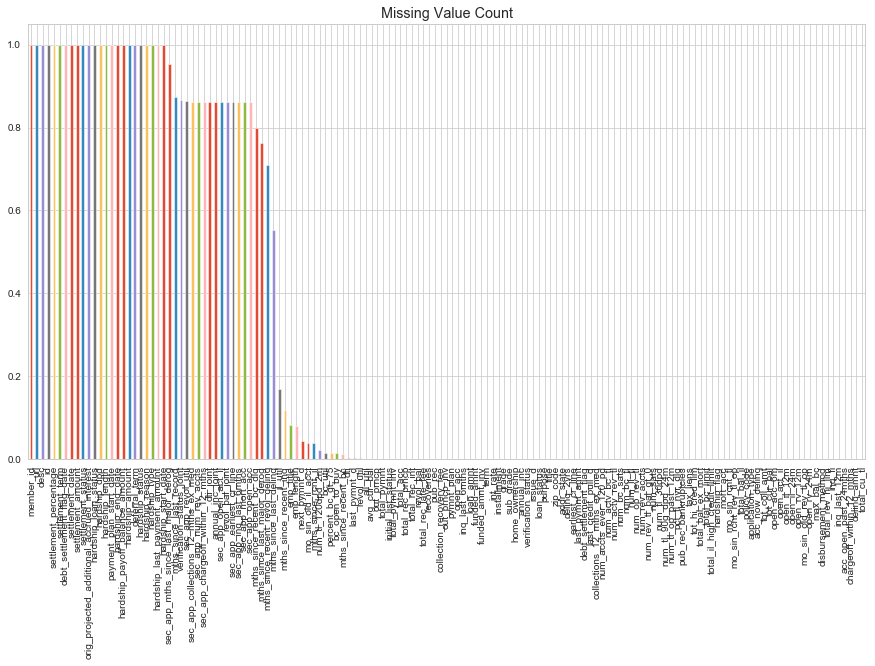

In [63]:
plt.figure(figsize = (15,8))
data.apply(lambda x: sum(pd.isnull(x)) / len(data)).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Value Count')
plt.show()

In [64]:
# Drop column with more than 50% missing values
thresh = len(data) / 2
data = data.dropna(thresh = thresh, axis = 1)

In [65]:
# Drop column with 1 unique value
data = data.loc[:,data.apply(pd.Series.nunique) != 1]

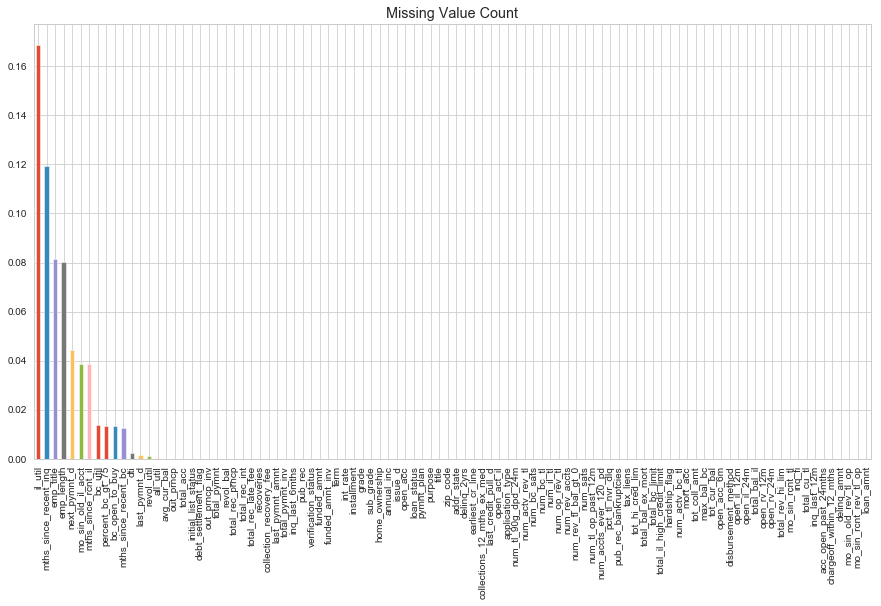

In [66]:
plt.figure(figsize = (15,8))
data.apply(lambda x: sum(pd.isnull(x))/ len(data)).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Value Count')
plt.show()

#### Missing Value - Categorical

In [67]:
pd.set_option('display.max_columns', 100) # to allow all columns to be printed
categorical = data.columns[data.dtypes == object].tolist()
data[categorical].head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,20.39%,D,D4,Realtor,3 years,OWN,Source Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,058xx,VT,Apr-2005,98.4%,w,Sep-2018,Oct-2018,Sep-2018,Joint App,N,Cash,N
1,60 months,13.06%,C,C1,Business Analyst,6 years,MORTGAGE,Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,956xx,CA,Sep-2000,69.9%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,DirectPay,N
2,60 months,10.56%,B,B3,Product Manager,8 years,MORTGAGE,Not Verified,Jun-2018,Current,n,credit_card,Credit card refinancing,152xx,PA,Jun-2005,32.3%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,Cash,N
3,36 months,6.83%,A,A3,City Attorney,2 years,MORTGAGE,Not Verified,Jun-2018,Current,n,debt_consolidation,Debt consolidation,750xx,TX,May-2001,7.4%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,Cash,N
4,60 months,17.47%,D,D1,Laborer,10+ years,OWN,Source Verified,Jun-2018,Current,n,credit_card,Credit card refinancing,476xx,IN,Mar-2003,60.1%,w,Sep-2018,Oct-2018,Sep-2018,Individual,N,DirectPay,N


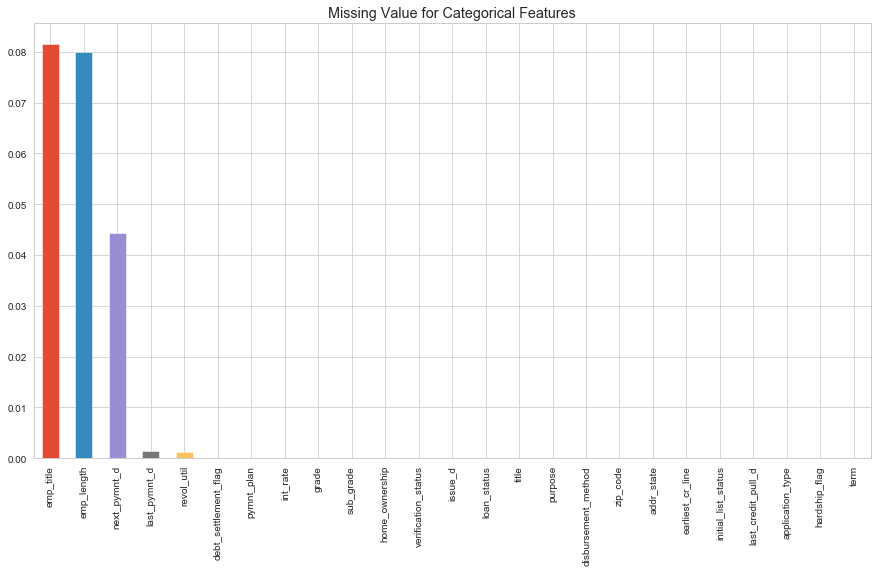

In [68]:
plt.figure(figsize = (15,8))
data[categorical].apply(lambda x:sum(pd.isnull(x))/len(data)).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Value for Categorical Features')
plt.show()

In [69]:
# convert some features to numerical
data['int_rate'] = data['int_rate'].str.strip('%').astype('float64')
data['revol_util'] = data['revol_util'].str.strip('%').astype('float64')
categorical = data.select_dtypes(include = ['object']).columns

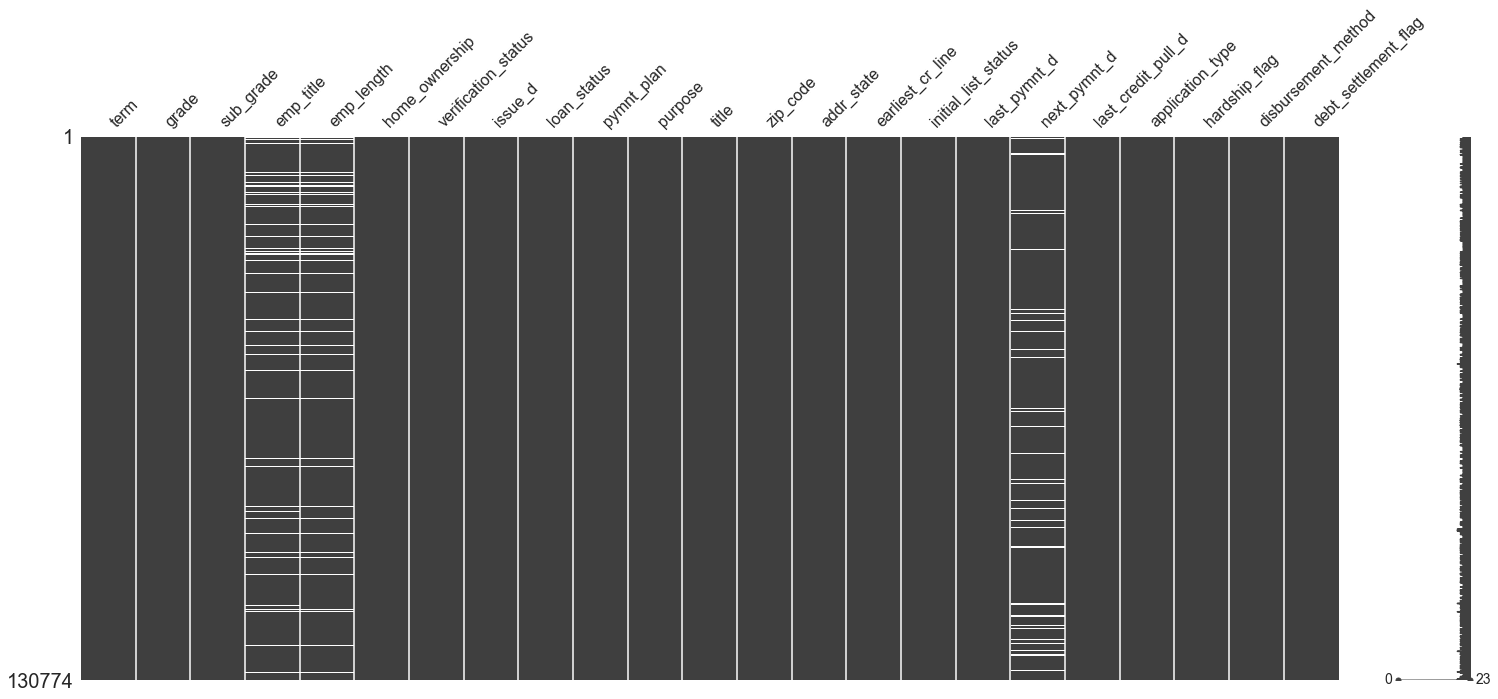

In [70]:
# Visualize Missing Values
msno.matrix(data[categorical])
plt.show()

* `emp_title`, `emp_length`, `next_payment_d` has most missing values, row 23 has most missing columns

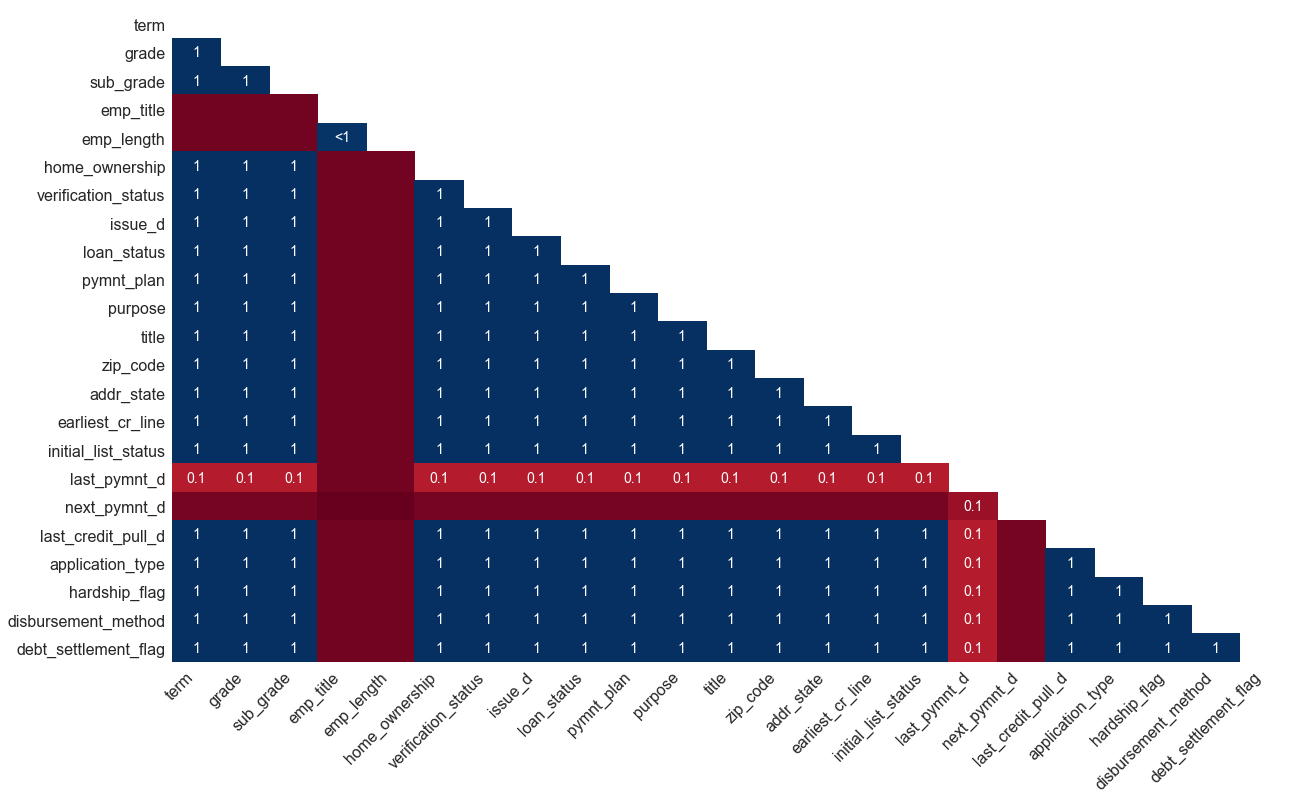

In [71]:
# checking correlation between missing values
msno.heatmap(data[categorical])
plt.show()

* The above plot shows the correlation between missing values. A value of 1 or -1 shows positive and negative correlation. The heatmap is limited when data is large

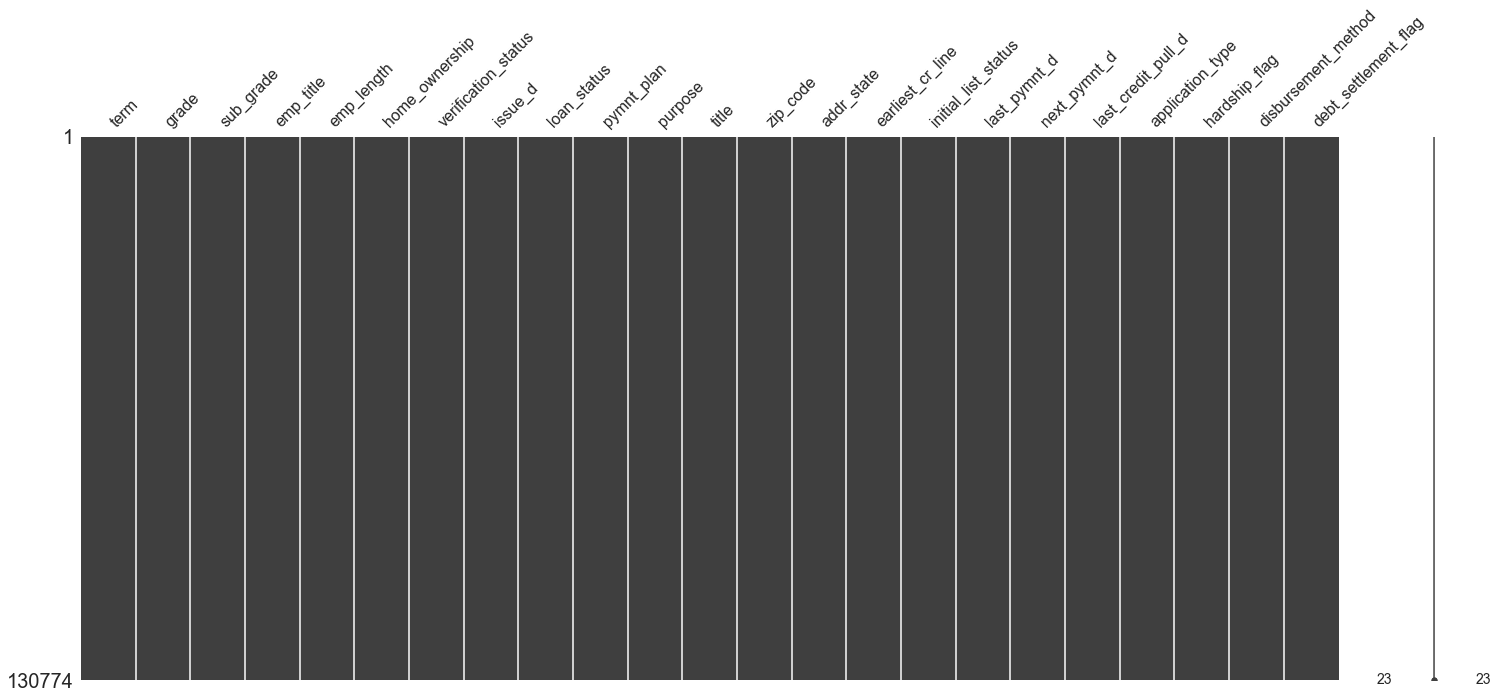

In [72]:
# Fill NA values with unknown
data[categorical] = data[categorical].fillna('unknown')
msno.matrix(data[categorical])
plt.show()

#### Missing Value - Numerical

In [73]:
numeric = data.select_dtypes(['float64']).columns
data[numeric].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000.00000,10000.00000,10000.00000,20.39000,373.63000,26000.00000,56.00000,0.00000,0.00000,10.00000,0.00000,35130.00000,98.40000,16.00000,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,373.63000,0.00000,0.00000,64253.00000,1.00000,3.00000,0.00000,1.00000,23.00000,29123.00000,69.00000,1.00000,6.00000,1103.00000,82.00000,35700.00000,0.00000,0.00000,1.00000,7.00000,6425.00000,133.00000,94.00000,0.00000,0.00000,158.00000,37.00000,1.00000,1.00000,1.00000,20.00000,12.00000,0.00000,2.00000,7.00000,2.00000,2.00000,7.00000,7.00000,8.00000,7.00000,10.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000
1,20000.00000,20000.00000,20000.00000,13.06000,455.68000,94000.00000,22.29000,1.00000,0.00000,12.00000,0.00000,51762.00000,69.90000,16.00000,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,455.68000,0.00000,0.00000,520838.00000,0.00000,1.00000,0.00000,0.00000,27.00000,17705.00000,70.00000,0.00000,1.00000,21516.00000,70.00000,74000.00000,0.00000,0.00000,1.00000,2.00000,43403.00000,10021.00000,82.00000,0.00000,0.00000,49.00000,213.00000,14.00000,8.00000,1.00000,14.00000,9.00000,0.00000,6.00000,10.00000,6.00000,6.00000,2.00000,10.00000,13.00000,10.00000,12.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000
2,14000.00000,14000.00000,14000.00000,10.56000,301.34000,98000.00000,16.02000,0.00000,0.00000,12.00000,0.00000,21930.00000,32.30000,16.00000,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,301.34000,0.00000,0.00000,188168.00000,1.00000,3.00000,2.00000,2.00000,10.00000,54827.00000,89.00000,1.00000,1.00000,9202.00000,54.00000,68000.00000,1.00000,1.00000,1.00000,3.00000,17106.00000,41570.00000,34.50000,0.00000,0.00000,142.00000,156.00000,4.00000,4.00000,1.00000,4.00000,9.00000,0.00000,5.00000,5.00000,7.00000,7.00000,6.00000,8.00000,9.00000,5.00000,12.00000,0.00000,3.00000,100.00000,16.70000,0.00000,0.00000,277254.00000,76757.00000,63500.00000,79008.00000
3,8000.00000,8000.00000,8000.00000,6.83000,246.40000,144000.00000,22.23000,0.00000,0.00000,15.00000,0.00000,2851.00000,7.40000,34.00000,7597.12000,7597.12000,486.73000,486.73000,402.88000,83.85000,0.00000,0.00000,0.00000,246.40000,0.00000,0.00000,416635.00000,1.00000,6.00000,2.00000,5.00000,6.00000,252494.00000,84.00000,0.00000,0.00000,1917.00000,47.00000,38400.00000,5.00000,1.00000,3.00000,6.00000,27776.00000,23119.00000,7.90000,0.00000,0.00000,168.00000,205.00000,25.00000,6.00000,4.00000,113.00000,6.00000,0.00000,2.00000,3.00000,4.00000,7.00000,18.00000,8.00000,12.00000,3.00000,15.00000,0.00000,2.00000,94.10000,0.00000,0.00000,0.00000,484141.00000,255345.00000,25100.00000,282141.00000
4,22000.00000,22000.00000,22000.00000,17.47000,552.34000,60000.00000,31.60000,0.00000,0.00000,9.00000,1.00000,19700.00000,60.1000

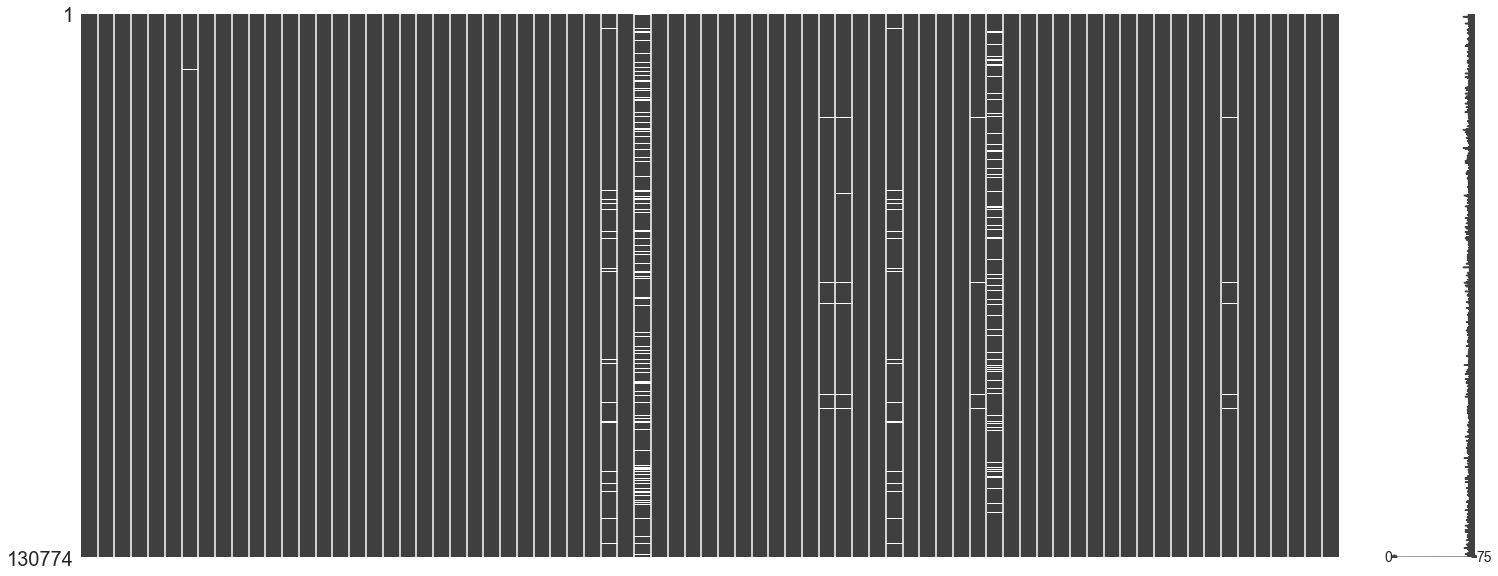

In [75]:
msno.matrix(data[numeric])
plt.show()

In [77]:
# drop rows with all missing columns
data[numeric].dropna(how = 'all', inplace = True)

In [78]:
# Fill NA values with mean
from sklearn.preprocessing import Imputer
im = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # columnwise
im.fit(data[numeric])
data[numeric] = im.transform(data[numeric])

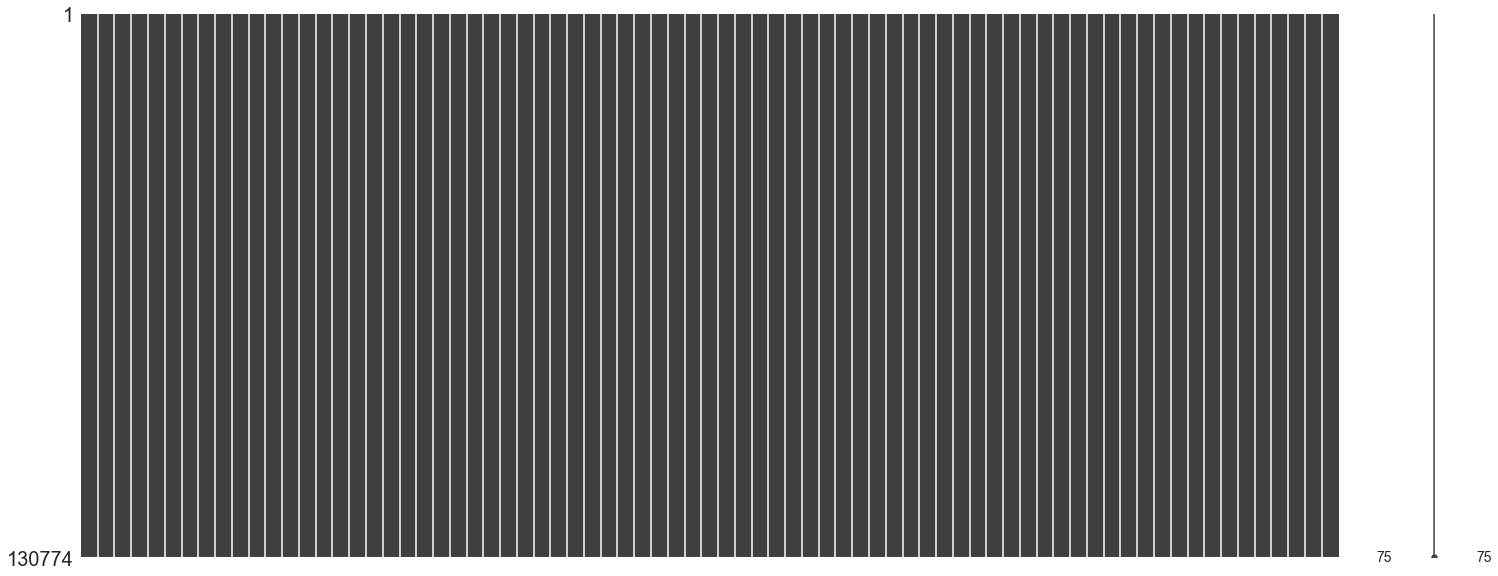

In [79]:
msno.matrix(data[numeric])
plt.show()

### Data Filtering

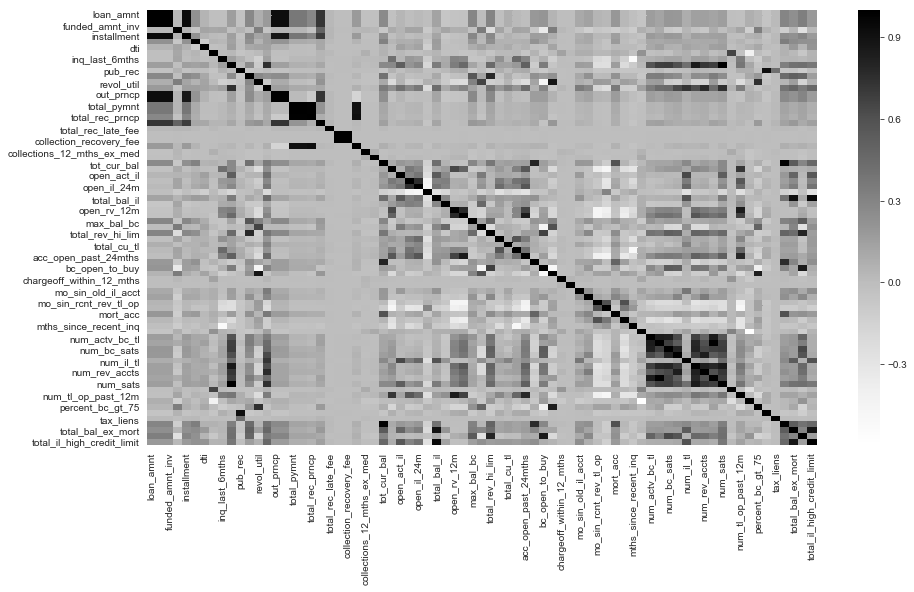

In [81]:
corr = data[numeric].corr()
fig, axes = plt.subplots(figsize = (15,8))
sns.heatmap(corr, cmap = 'Greys')
plt.show()

In [82]:
for name in categorical:
    print('\nFreqeuncy Count for Variable {0}'.format(name))
    print(data[name].value_counts())


Freqeuncy Count for Variable term
 36 months    91506
 60 months    39266
unknown           2
Name: term, dtype: int64

Freqeuncy Count for Variable grade
B          38246
C          35512
A          33016
D          18544
E           4349
F            923
G            182
unknown        2
Name: grade, dtype: int64

Freqeuncy Count for Variable sub_grade
B4         8575
B5         8202
C1         7913
B2         7913
B1         7795
A4         7712
C2         7181
C3         7094
C4         6857
A3         6857
C5         6467
A1         6236
A5         6223
A2         5988
B3         5761
D1         4338
D2         4073
D3         3651
D4         3333
D5         3149
E5         1280
E3          966
E4          853
E1          682
E2          568
F1          481
G1          154
F2          138
F3          112
F5          104
F4           88
G2           12
G3            9
G5            4
G4            3
unknown       2
Name: sub_grade, dtype: int64

Freqeuncy Count for Variable emp_ti


Freqeuncy Count for Variable debt_settlement_flag
N          130768
Y               4
unknown         2
Name: debt_settlement_flag, dtype: int64


* `sub_grade`: repeated information, similar variable to `grade`
* `emp_title`: 10664 unknown values, and there are too many categories
* `issue_d`: Not known before loan issued
* `pymnt_plan`: Almost all no
* `title`: Similar to purpose
* `zip_code`: Not useful
* `addr_state`: Can be excluded because it does not reflect a candidate ability to repay debt
* `last_pymnt_d`, `next_pymnt_d` : not knownn before loan issued
* `hardship_flag`: Almost all No
* `debt_settlement_flag`: Almost all No

In [83]:
# delete variables that are not relevant
exclude = ['sub_grade', 'emp_title', 'issue_d', 'pymnt_plan', 'zip_code', 
           'title','addr_state', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
           'last_credit_pull_d','hardship_flag', 'debt_settlement_flag']

In [84]:
data.drop(exclude, axis = 1, inplace = True)

In [87]:
data[numeric].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000,130774.00000
mean,15908.82758,15908.82758,15905.58109,12.56098,463.12053,78665.13218,19.28753,0.23520,0.44739,11.44259,0.13324,15531.62358,43.41945,22.47281,14084.94185,14082.12315,2400.30417,2399.77774,1807.76636,592.35924,0.15061,0.02796,0.00503,1041.57651,0.01749,196.19348,140239.85625,0.88572,2.67345,0.68215,1.51618,21.54394,34879.27131,68.30087,1.27823,2.73277,5575.07755,54.06658,36963.60877,1.10810,1.46270,2.02756,4.52704,13461.56736,14467.05487,49.56075,0.00664,1.57463,122.29770,172.21588,14.84687,8.73517,1.30648,25.17894,7.42094,0.48452,3.55247,5.30125,4.76456,7.01179,8.12114,8.14211,12.84767,5.26964,11.42109,0.06119,2.09133,94.42794,32.66970,0.12408,0.00905,180023.71279,50716.80032,25425.28461,44900.20730
std,10129.77148,10129.77148,10128.87309,5.10058,286.19739,87534.42608,19.45389,0.74696,0.72283,5.98123,0.37197,22713.72611,24.98845,12.15693,9775.89921,9775.07032,3764.19315,3763.58658,3690.61444,509.33344,2.52288,7.72141,1.38985,3453.44438,0.14530,1599.12113,162248.56925,1.12418,2.95305,0.93823,1.56515,25.73271,44702.02828,21.68879,1.53862,2.64872,6431.27066,21.32012,37847.79283,1.54623,2.64821,2.45404,3.31291,16935.62139,19021.90015,29.07601,0.08789,192.46873,54.39415,100.10125,18.49673,9.59605,1.68033,33.25702,5.67719,1.38775,2.39978,3.43365,3.12668,4.49024,7.40410,4.95529,7.89437,3.37863,5.97570,0.41973,1.93588,9.27267,34.88151,0.33717,0.15137,182544.43557,52472.55634,25327.30906,47136.46592
min,1000.00000,1000.00000,1000.00000,5.31000,30.12000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0

##### Include
* `loan_amnt`: Loan amount
* `int_rate`: interest rate associated with loan
* `annual_inc`: annual income
* `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years!
* `inq_last_6mths`: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
* `open_acc`: The number of open credit lines in the borrower's credit file.
* `pub_rec`:Number of derogatory public records!
* `revol_util`: ratio of revolving balance to credit limit

In [88]:
# drop last payment amount 
exclude = ['last_pymnt_amnt']
data.drop(exclude, axis = 1, inplace = True)

In [89]:
data.shape

(130774, 84)

In [90]:
data.dtypes.value_counts()

float64    74
object     10
dtype: int64

* There are 84 variables. 74 numerical and 10 categorical

### Feature Engineering

#### 1. Generate New Features

In [91]:
data['installment_feat'] = data['installment'] / (data['annual_inc'] / 12) 

data['installment_feat'][data['installment_feat'] == float('Inf')] = np.mean(data['installment_feat'][data['installment_feat'] != float('Inf')])

* We compute the ratio of installment over 1/12 of annual income, the higher the ratio, the more responsbility a borrower needs to repay the debt each month

#### 2. Feature Extraction

In [93]:
data = data[data['loan_status'] != 'unknown']

In [94]:
# convert to binary coding for loan status
map_dict = {
    'loan_status':
        {'Current':0, 'Fully Paid':0,'In Grace Period':1, 
         'Late (16-30 days)':1, 'Late (31-120 days)':1, 'Charged Off':1}
}
data = data.replace(map_dict)

In [96]:
count = [i for i in data.loan_status.value_counts()]
attr = ['Normal','Default']
pie = Pie('Percentage of Default loans')
pie.add('', attr, count, is_label_show = True)
pie

In [97]:
data.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
term,130772,2,36 months,91506
grade,130772,7,B,38246
emp_length,130772,12,10+ years,43815
home_ownership,130772,4,MORTGAGE,61720
verification_status,130772,3,Source Verified,53100
purpose,130772,12,debt_consolidation,64141
earliest_cr_line,130772,640,Aug-2006,1118
application_type,130772,2,Individual,112685
disbursement_method,130772,2,Cash,116353


#### Ordinal Values

* `grade`: LC assigned loan grade!
* `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

#### Nominal Values

* `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
* `home_ownership`:The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER!
* `verfication_status`:Indicates if income was verified by LC, not verified, or if the income source was verified!
* `purpose`:A category provided by the borrower for the loan request. 
* `application_type`:Indicates whether the loan is an individual application or a joint application with two co-borrowers!
* `disbursement_method`:The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY
* `earliest_cr_line`: Earliest credit line

In [99]:
map_dict = {
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'unknown':0
    },
    'grade':{
        'A':1,
        "B":2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7
    }
}

data = data.replace(map_dict)

#### One-Hot enconding for Nominal Values

* `home_ownership`

In [101]:
data['home_ownership'].value_counts()

MORTGAGE    61720
RENT        52131
OWN         16907
ANY            14
Name: home_ownership, dtype: int64

In [102]:
data['home_ownership'].replace('ANY','OWN', inplace = True)

* `purpose`

In [103]:
data['purpose'].value_counts()

debt_consolidation    64141
credit_card           32822
other                 11309
home_improvement       9652
major_purchase         3763
house                  2240
medical                1958
car                    1525
small_business         1243
vacation               1115
moving                  932
renewable_energy         72
Name: purpose, dtype: int64

In [104]:
# group purpose
map_list = {
    'house':'home_improvement',
    'medical':'other',
    'car':'other',
    'small_business':'other',
    'vacation':'other',
    'moving':'home_improvement',
    'renewable_energy':'other'
}

data['purpose'].replace(map_list, inplace = True)

* `earliest_cr_line`

In [106]:
# extract years from earliest credit line
data['earliest_cr_line'] = data['earliest_cr_line'].str[-4:]
data['earliest_cr_line'].value_counts().sort_index().head()

1955    2
1956    1
1958    5
1959    3
1960    8
Name: earliest_cr_line, dtype: int64

In [107]:
data['earliest_cr_line'].astype(int).describe()

count   130772.00000
mean      2001.91834
std          7.85687
min       1955.00000
25%       1998.00000
50%       2004.00000
75%       2007.00000
max       2015.00000
Name: earliest_cr_line, dtype: float64

In [108]:
def credit_line(val):
    if val < 1998:
        return 1
    elif val < 2004:
        return 2
    elif val < 2007:
        return 3
    else:
        return 4
    
data['earliest_cr_line'] = data['earliest_cr_line'].astype(int).apply(credit_line)

#### Dummy Coding 

In [110]:
cols = ['term', 'home_ownership','verification_status', 'purpose', 'application_type', 'disbursement_method']
dummy_df = pd.get_dummies(data[cols])

data = pd.concat([data, dummy_df], axis = 1)

In [111]:
data = data.drop(cols, axis = 1)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,10000.00000,10000.00000,10000.00000,20.39000,373.63000,4,3,26000.00000,0,56.00000,0.00000,3,0.00000,10.00000,0.00000,35130.00000,98.40000,16.00000,9589.10000,9589.10000,741.60000,741.60000,410.90000,330.70000,0.00000,0.00000,0.00000,0.00000,0.00000,64253.00000,1.00000,3.00000,0.00000,1.00000,23.00000,29123.00000,69.00000,1.00000,6.00000,1103.00000,82.00000,35700.00000,0.00000,0.00000,1.00000,7.00000,6425.00000,133.00000,94.00000,0.00000,0.00000,158.00000,37.00000,1.00000,1.00000,1.00000,20.00000,12.00000,0.00000,2.00000,7.00000,2.00000,2.00000,7.00000,7.00000,8.00000,7.00000,10.00000,0.00000,1.00000,100.00000,100.00000,0.00000,0.00000,78151.00000,64253.00000,2200.00000,42451.00000,0.17244,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
1,20000.00000,20000.00000,20000.00000,13.06000,455.68000,3,6,94000.00000,0,22.29000,1.00000,2,0.00000,12.00000,0.00000,51762.00000,69.90000,16.00000,19521.38000,19521.38000,882.34000,882.34000,478.62000,403.72000,0.00000,0.00000,0.00000,0.00000,0.00000,520838.00000,0.00000,1.00000,0.00000,0.00000,27.00000,17705.00000,70.00000,0.00000,1.00000,21516.00000,70.00000,74000.00000,0.00000,0.00000,1.00000,2.00000,43403.00000,10021.00000,82.00000,0.00000,0.00000,49.00000,213.00000,14.00000,8.00000,1.00000,14.00000,9.00000,0.00000,6.00000,10.00000,6.00000,6.00000,2.00000,10.00000,13.00000,10.00000,12.00000,0.00000,1.00000,93.80000,50.00000,0.00000,0.00000,554201.00000,69467.00000,55700.00000,25201.00000,0.05817,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,14000.00000,14000.00000,14000.00000,10.56000,301.34000,2,8,98000.00000,0,16.02000,0.00000,3,0.00000,12.00000,0.00000,21930.00000,32.30000,16.00000,13642.15000,13642.15000,586.25000,586.25000,357.85000,228.40000,0.00000,0.00000,0.00000,0.00000,0.00000,188168.00000,1.00000,3.00000,2.00000,2.00000,10.00000,54827.00000,89.00000,1.00000,1.00000,9202.00000,54.00000,68000.00000,1.00000,1.00000,1.00000,3.00000,17106.00000,41570.00000,34.50000,0.00000,0.00000,142.00000,156.00000,4.00000,4.00000,1.00000,4.00000,9.00000,0.00000,5.00000,5.00000,7.00000,7.00000,6.00000,8.00000,9.00000,5.00000,12.00000,0.00000,3.00000,100.00000,16.70000,0.00000,0.00000,277254.00000,76757.00000,63500.00000,79008.00000,0.03690,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,8000.00000,8000.00000,8000.00000,6.83000,246.40000,1,2,144000.00000,0,22.23000,0.00000,2,0.00000,15.00000,0.00000,2851.00000,7.40000,34.00000,7597.12000,7597.12000,486.73000,486.73000,402.88000,83.85000,0.00000,0.00000,0.00000,0.00000,0.00000,4

#### 3. Feature Scaling

In [115]:
col = data.select_dtypes(['float64', 'int64']).columns
len(col)

79

In [116]:
col = col.drop('loan_status') # drop target variable
loan_df = data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
loan_df[col] = sc.fit_transform(loan_df[col])
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,-0.58331,-0.58331,-0.58304,1.53492,-0.31269,1.34628,-0.64067,-0.60165,0,1.88715,-0.31488,0.40537,-0.61894,-0.24119,-0.35819,0.86284,2.20023,-0.53244,-0.45989,-0.45964,-0.44065,-0.44058,-0.37849,-0.51373,-0.05970,-0.00362,-0.00362,-0.12036,-0.12269,-0.46833,0.10166,0.11058,-0.72706,-0.32980,0.05658,-0.12877,0.03223,-0.18083,1.23351,-0.69536,1.31019,-0.03339,-0.71664,-0.55233,-0.41872,0.74646,-0.41549,-0.75355,1.52838,-0.07552,-0.00818,0.65636,-1.35079,-0.74861,-0.80607,-0.18239,-0.15572,0.80657,-0.34914,-0.64692,0.49473,-0.88418,-1.11615,-0.15142,-0.23048,-0.61407,0.51215,-0.23781,-0.14579,-0.56374,0.60091,1.93025,-0.36800,-0.05976,-0.55807,0.25797,-0.91700,-0.05196,-0.00282,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
1,0.40387,0.40387,0.40423,0.09784,-0.02600,0.48458,0.13196,0.17519,0,0.15434,1.02387,-0.48432,-0.61894,0.09319,-0.35819,1.59508,1.05971,-0.53244,0.55610,0.55644,-0.40326,-0.40319,-0.36014,-0.37036,-0.05970,-0.00362,-0.00362,-0.12036,-0.12269,2.34576,-0.78787,-0.56668,-0.72706,-0.96871,0.21203,-0.38419,0.07834,-0.83076,-0.65419,2.47865,0.74734,0.97856,-0.71664,-0.55233,-0.41872,-0.76278,1.76795,-0.23373,1.11567,-0.07552,-0.00818,-1.34752,0.40743,-0.04578,-0.07661,-0.18239,-0.33614,0.27814,-0.34914,1.01990,1.36844,0.39513,-0.22533,-0.82672,0.37493,0.01930,1.40008,0.09688,-0.14579,-0.56374,-0.06772,0.49683,-0.36800,-0.05976,2.04978,0.35733,1.19533,-0.41792,-0.00678,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,-0.18844,-0.18844,-0.18813,-0.39230,-0.56527,-0.37713,0.64705,0.22088,0,-0.16796,-0.31488,0.40537,-0.61894,0.09319,-0.35819,0.28170,-0.44498,-0.53244,-0.04529,-0.04501,-0.48192,-0.48186,-0.39286,-0.71458,-0.05970,-0.00362,-0.00362,-0.12036,-0.12269,0.29540,0.10166,0.11058,1.40461,0.30912,-0.44861,0.44624,0.95437,-0.18083,-0.65419,0.56395,-0.00312,0.82003,-0.06991,-0.17472,-0.41872,-0.46093,0.21519,1.42482,-0.51798,-0.07552,-0.00818,0.36221,-0.16199,-0.58642,-0.49345,-0.18239,-0.63682,0.27814,-0.34914,0.60319,-0.08773,0.71495,-0.00263,-0.28648,-0.02868,-0.48739,-0.07981,0.09688,-0.14579,0.46938,0.60091,-0.45783,-0.36800,-0.05976,0.53264,0.49626,1.50330,0.72359,-0.00752,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,-0.78075,-0.78075,-0.78050,-1.12359,-0.75724,-1.23884,-0.89821,0.74639,0,0.15125,-0.31488,-0.48432,-0.61894,0.59476,-0.35819,-0.55828,-1.44144,0.94820,-0.66365,-0.66342,-0.50836,-0.50830,-0.38066,-0.99838,-0.05970,-0.00362,-0.00362,-0.12036,-0.12269,1.70352,0.10166,1.12647,1.40461,2.22586,-0.60405,4.86810,0.72383,-0.83076,-1

#### 4. Feature Selection

* **Filter Approach**: Based on correlation between independent and dependent variable

* **Embedded approach**: Model based variable selection method

* **Wrapper approach**: AUC/MSE to determine whether a variable should be included

In [118]:
X = loan_df.drop('loan_status', axis = 1)
y = loan_df['loan_status']

* **Wrapper**: Use recursive feature elimination (RFE) to select 30 variables that have highest correlation with target variable, for the purpose of dimensionality reduction

In [120]:
# Wrapper
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(lr, 30)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False False False False False
  True False False False False  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False  True  True False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False False False  True  True  True  True]
[ 1  1  1  1  1  1 38 59 37 46 66  6  1  4 34 53 20  1  1  1  1  1  1  2 41
 55 44 65 17 40 58 54 26 61 22 16 30 25 42 15 24 48 27 28  8 18 56 31 63 11
 35 51 62 45 57 52 12 39 43  1 60 13 21 49 19  1  1 47 29 50 32  3  5 36 23
 14 64  7  1  1  1  1  1  1  1  1  1  1  9 33 10  1  1  1  1]


In [122]:
col_wrapper = X.columns[rfe.support_]
col_wrapper.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'grade',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'num_actv_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'term_ 36 months',
 'term_ 60 months',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'application_type_Individual',
 'application_type_Joint App',
 'disbursement_method_Cash',
 'disbursement_method_DirectPay']

In [123]:
len(col_wrapper)

30

* **Filter**: Pearson Correlation plot for variable selection

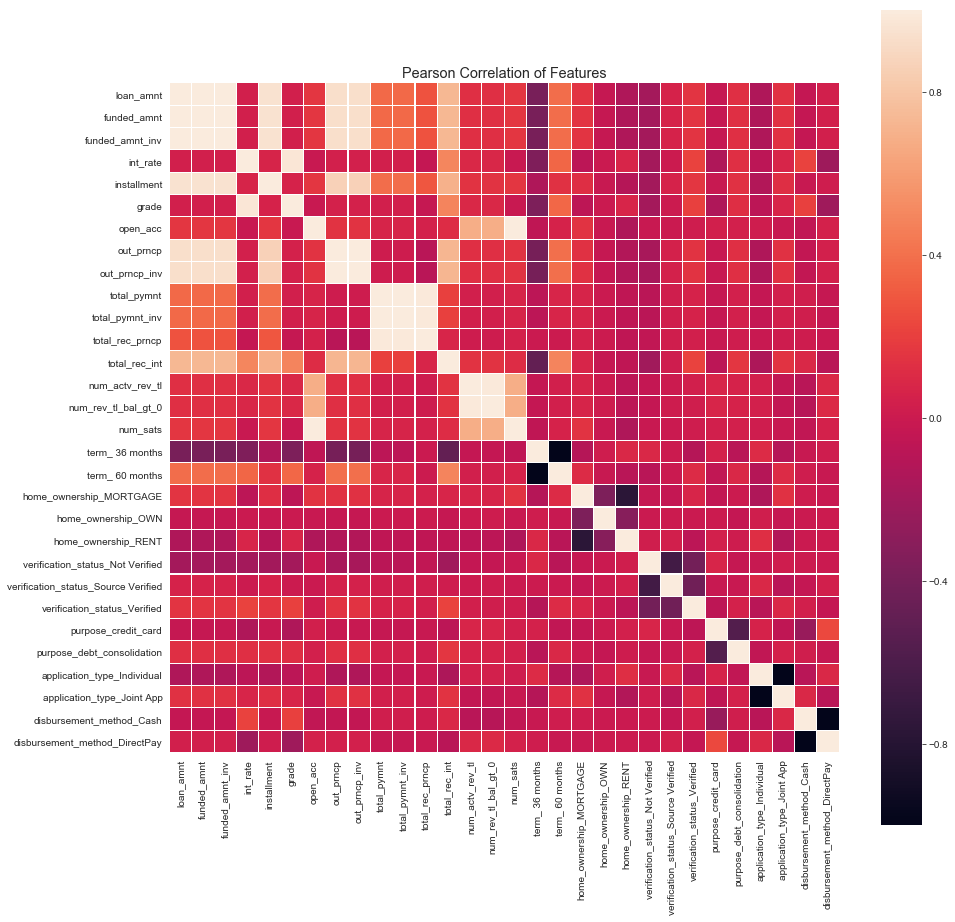

In [124]:
fig, axes = plt.subplots(figsize = (15,15))
plt.title("Pearson Correlation of Features")
sns.heatmap(loan_df[col_wrapper].corr(), square = True, linewidths = 0.1, vmax = 1.0)
plt.show()

In [127]:
exclude = ['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp', 'out_prncp_inv',
          'total_pymnt_inv', 'total_rec_prncp', 'num_rev_tl_bal_gt_0',
          'num_sats']

col_filter = col_wrapper.drop(exclude)
col_filter.tolist()

['loan_amnt',
 'int_rate',
 'grade',
 'open_acc',
 'total_pymnt',
 'total_rec_int',
 'num_actv_rev_tl',
 'term_ 36 months',
 'term_ 60 months',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'application_type_Individual',
 'application_type_Joint App',
 'disbursement_method_Cash',
 'disbursement_method_DirectPay']

In [128]:
len(col_filter)

21

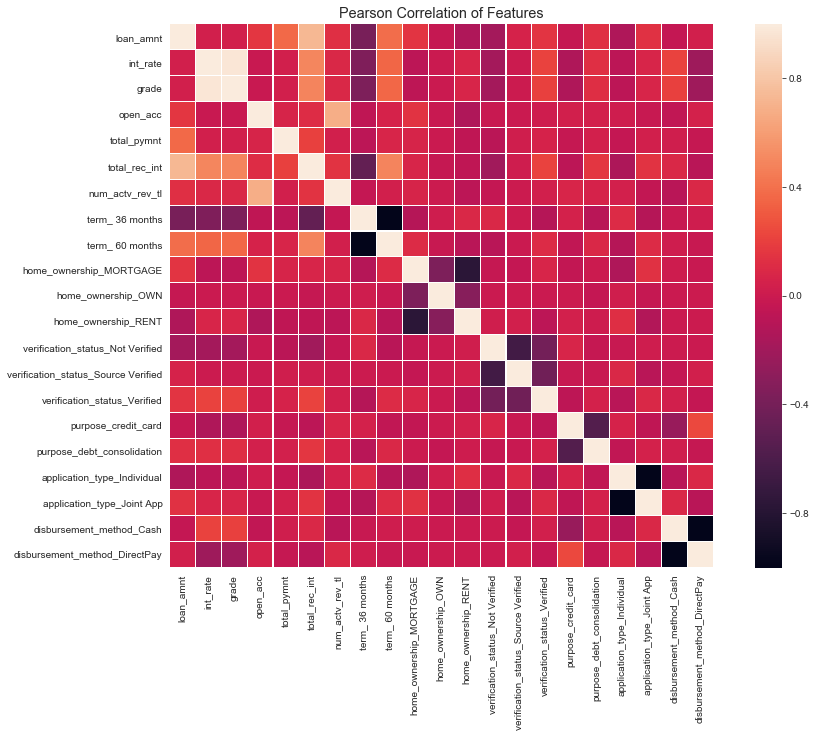

In [129]:
fig, axes = plt.subplots(figsize = (15,10))
plt.title("Pearson Correlation of Features")
sns.heatmap(loan_df[col_filter].corr(), square = True, linewidths = 0.1, vmax = 1.0)
plt.show()

* **Embedded** : Use Random Forest for feature importance plot

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, random_state = 123)
rf.fit(X[col_filter], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

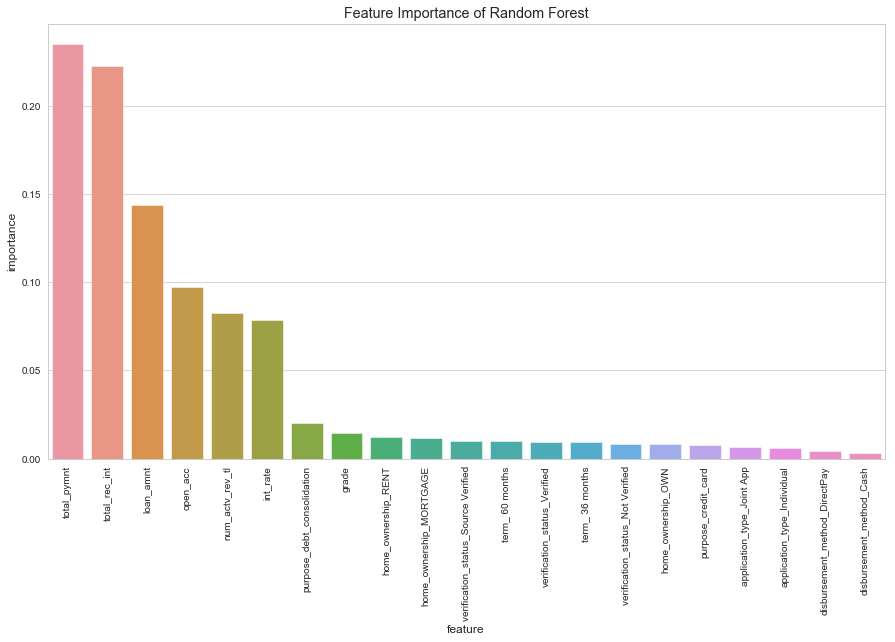

In [131]:
impor = pd.DataFrame({
    'feature': col_filter,
    'importance': rf.feature_importances_
})
impor = impor.sort_values('importance', ascending = False)

fig, axes = plt.subplots(figsize = (15,8))
sns.barplot(x = 'feature', y = 'importance', data = impor)
plt.xticks(rotation = 90)
plt.title('Feature Importance of Random Forest')
plt.show()

In [135]:
final_data = data[col_filter]
final_data['target'] = y
final_data.head()

,loan_amnt,int_rate,grade,open_acc,total_pymnt,total_rec_int,num_actv_rev_tl,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,target
0,-0.58331,1.53492,1.34628,-0.24119,-0.44065,-0.51373,0.49473,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0
1,0.40387,0.09784,0.48458,0.09319,-0.40326,-0.37036,1.36844,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0
2,-0.18844,-0.39230,-0.37713,0.09319,-0.48192,-0.71458,-0.08773,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0
3,-0.78075,-1.12359,-1.23884,0.59476,-0.50836,-0.99838,-0.67020,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0
4,0.60131,0.96244,1.34628,-0.40838,-0.35554,0.00418,0.49473,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [136]:
final_data.shape

(130772, 22)

In [137]:
# Write to CSV file
final_data.to_csv('final_df.csv', index = False)

In [138]:
# check final data
# df = pd.read_csv('final_df.csv')
# df.head()

,loan_amnt,int_rate,grade,open_acc,total_pymnt,total_rec_int,num_actv_rev_tl,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,target
0,-0.58331,1.53492,1.34628,-0.24119,-0.44065,-0.51373,0.49473,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0
1,0.40387,0.09784,0.48458,0.09319,-0.40326,-0.37036,1.36844,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0
2,-0.18844,-0.39230,-0.37713,0.09319,-0.48192,-0.71458,-0.08773,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0
3,-0.78075,-1.12359,-1.23884,0.59476,-0.50836,-0.99838,-0.67020,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0
4,0.60131,0.96244,1.34628,-0.40838,-0.35554,0.00418,0.49473,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
